In [1]:
from torchvision.datasets import MNIST
from torchvision import transforms

from tqdm import tqdm
from torch import optim

import torch
import matplotlib.pyplot as plt

from ddpm import DDMSampler, UNetSimple

In [2]:

batch_size = 64

train = MNIST('./', download=True,  train=True, transform=transforms.ToTensor())
test = MNIST('./', download=True,  train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

In [3]:
# device = 'cuda'
device = 'cpu'

In [4]:
eps_model = UNetSimple(n_channels=64)
print(sum([p.numel() for p in eps_model.parameters() if p.requires_grad]))

2484673


loss_item=0.022598301991820335: 100%|██████████| 20/20 [19:42<00:00, 59.11s/it]


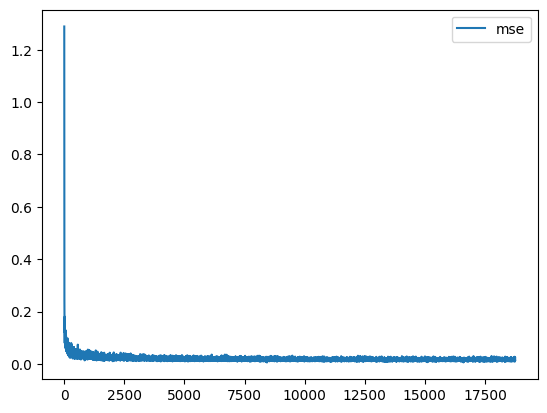

In [ ]:
N_EPOCHS = 20


dif_model = DDMSampler(eps_model, device=device)

opt = optim.Adam(eps_model.parameters(), lr=1e-4)
losses = []

for _ in (pbar := tqdm(range(N_EPOCHS))):
    for batch_idx, (data, labels) in enumerate(train_loader):
        data = data.to(device)
        opt.zero_grad()
        loss = dif_model.loss(data)
        loss.backward()
        opt.step()
        loss_item = loss.detach().cpu().item()
        losses.append(loss_item)
    pbar.set_description(f'{loss_item=}')

plt.plot(losses, label='mse')
plt.legend();

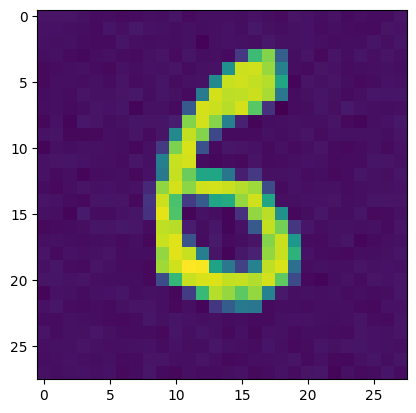

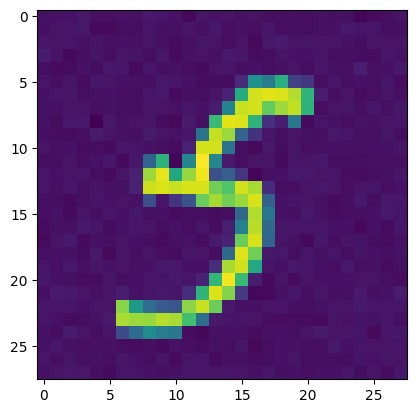

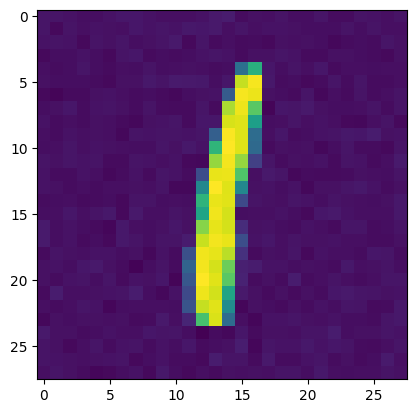

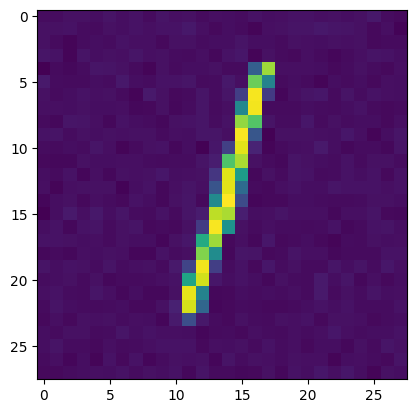

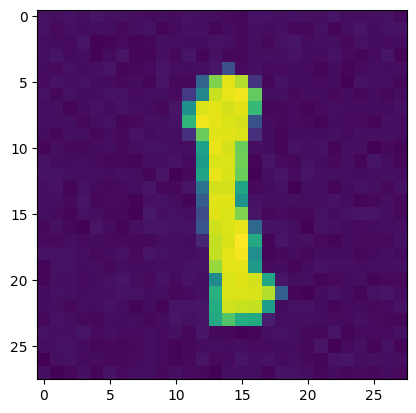

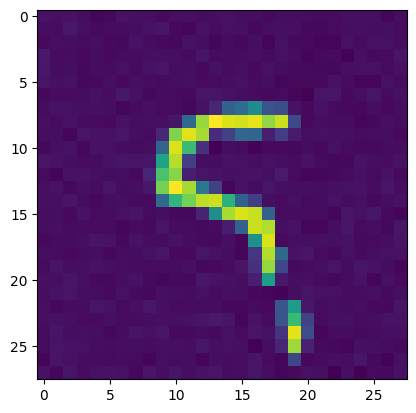

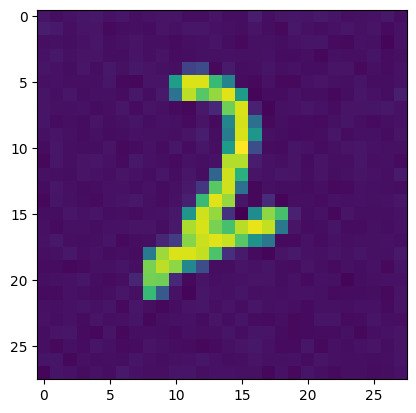

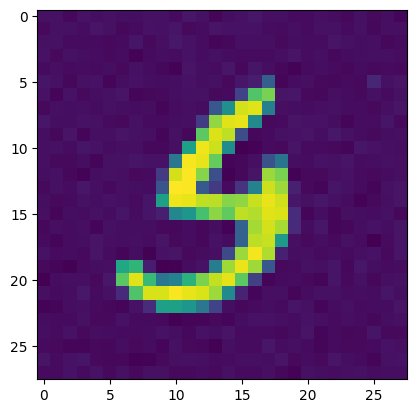

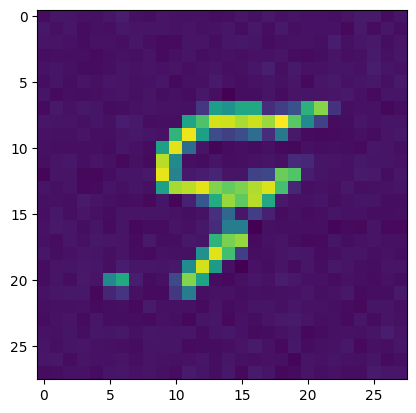

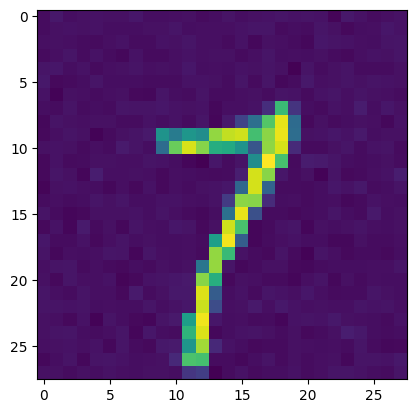

In [8]:
n_samples = 10

with torch.no_grad():
    x = torch.randn([n_samples, 1, 28, 28], device=device)

    for t_ in range(1_000):
        # $t$
        t = 1000 - t_ - 1
        x = dif_model.p_sample_given_xt(x, x.new_full((1,), t, dtype=torch.long))

x = x.cpu().numpy()
for i in range(n_samples):
  plt.imshow(x[i][0])
  plt.show()